# SPAM SMS Detection Bahasa Indonesia
Pengguna smartphone di Indonesia seringkali diteror dengan SMS spam yang isinya 'sok akrab' dengan menyebut nama mereka, teman bahkan keluarga. Padahal, SMS itu datang dari nomor yang tidak dikenal dan isinya link untuk masuk dalam situs penipuan. Oleh sebab itu, hal ini membutuhkan solusi agar smartphone kita dapat menyaring SMS penting dengan pesan-pesan yang mengganggu dan meresahkan tersebut.

In [1]:
# Import Library yang digunakan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional

In [2]:
# download dataset 'http://bit.ly/yw_sms_spam_indonesia'
pesan = '/content/dataset_sms_spam_v1.csv'
pesan = pd.read_csv(pesan)
pesan.tail()

,Teks,label
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",0
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,0
1140,Mba mau kirim 300 ya,0
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,0
1142,No bri atas nama kamu mana,0


In [3]:
pesan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Teks    1143 non-null   object
 1   label   1143 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.0+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


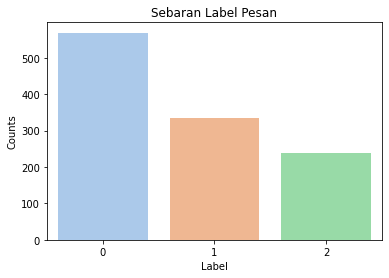

In [4]:
# pesan['label'].value_counts()
sns.countplot(pesan['label'], palette='pastel')
plt.title("Sebaran Label Pesan")
plt.xlabel("Label")
plt.ylabel("Counts")
plt.show()

In [5]:
# Merubah label dataset
def getlabel(int):
    if int==2:
        return 1
    elif int==1:
        return 1
    else:
        return 0

# membuat kolom baru
pesan['SMS_Label'] = pesan['label'].apply(getlabel)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


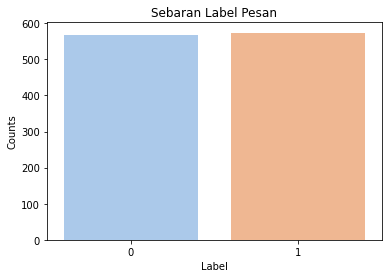

In [6]:
# pesan['SMS_Label'].value_counts()
sns.countplot(pesan['SMS_Label'], palette='pastel')
plt.title("Sebaran Label Pesan")
plt.xlabel("Label")
plt.ylabel("Counts")
plt.show()

In [7]:
pesan = pesan.drop(['label'],axis=1)

In [8]:
Bukan_SMS_SPAM = pesan[pesan.SMS_Label ==0]
SMS_SPAM = pesan[pesan.SMS_Label==1]

Bukan_SMS_SPAM_Teks = " ".join(Bukan_SMS_SPAM.Teks.to_numpy().tolist())
SMS_SPAM_Teks = " ".join(SMS_SPAM.Teks.to_numpy().tolist())

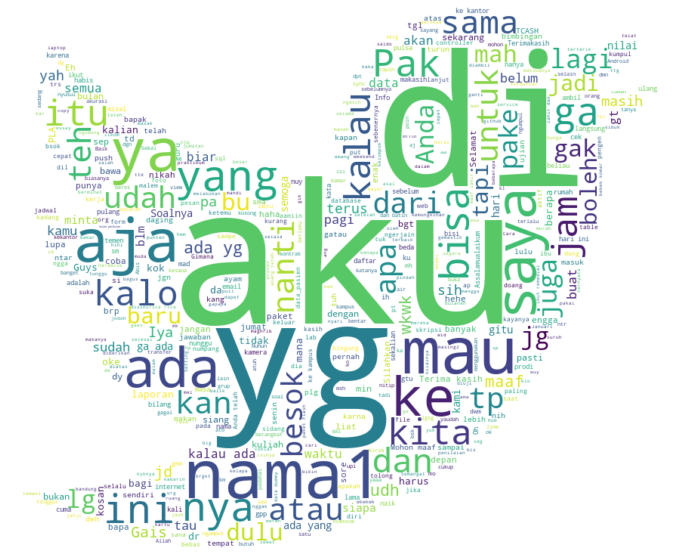

In [9]:
mask = np.array(Image.open('/content/twittersssssss.png'))
# wordcloud of ham messages
pesan_cloud = WordCloud(mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0]).generate(Bukan_SMS_SPAM_Teks)
plt.figure(figsize=(16,10))
plt.imshow(pesan_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

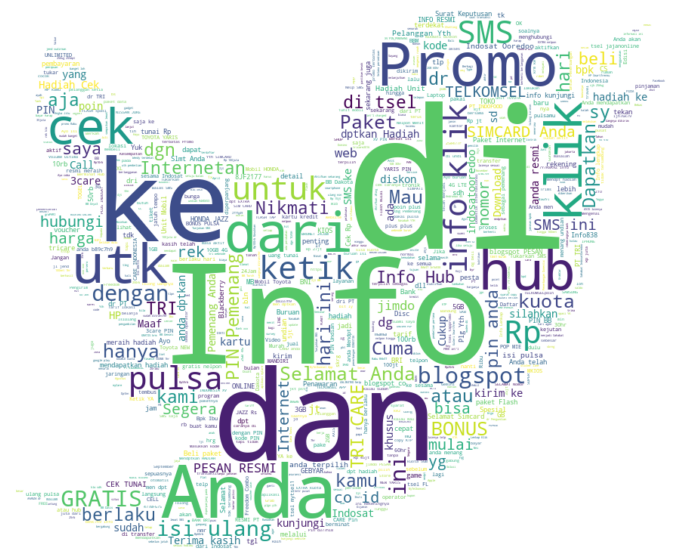

In [10]:
mask = np.array(Image.open('/content/twittersssssss.png'))
# wordcloud of ham messages
spam_cloud = WordCloud(mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0]).generate(SMS_SPAM_Teks)
plt.figure(figsize=(16,10))
plt.imshow(spam_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

In [11]:
pesan.head()

,Teks,SMS_Label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,1
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,1
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",1
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",1
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,1


In [12]:
label = pesan['SMS_Label'].values
train_teks, test_teks, train_label, test_label = train_test_split(pesan['Teks'], label, test_size=0.2, random_state=434)

In [13]:
# Definisi hyperparameters untuk pre-processing 
max_len = 50 
trunc_type = "post" 
padding_type = "post" 
oov_tok = "<OOV>" 
vocab_size = 500

In [14]:
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(train_teks)

In [15]:
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'di': 2,
 'anda': 3,
 'info': 4,
 'ke': 5,
 'www': 6,
 'com': 7,
 'pin': 8,
 'no': 9,
 'ini': 10,
 'ada': 11,
 'yg': 12,
 'aku': 13,
 'hadiah': 14,
 'mau': 15,
 'sms': 16,
 'dan': 17,
 'rp': 18,
 'dari': 19,
 'klik': 20,
 'pulsa': 21,
 '1': 22,
 'aja': 23,
 'cek': 24,
 'hub': 25,
 'nama1': 26,
 'paket': 27,
 'ya': 28,
 'yang': 29,
 'tri': 30,
 'selamat': 31,
 'saya': 32,
 'hari': 33,
 'promo': 34,
 'atau': 35,
 'untuk': 36,
 'blogspot': 37,
 'isi': 38,
 'kalau': 39,
 'resmi': 40,
 'pemenang': 41,
 '2': 42,
 '3': 43,
 'm': 44,
 'u': 45,
 'bisa': 46,
 'dr': 47,
 'pt': 48,
 'gratis': 49,
 'utk': 50,
 'kuota': 51,
 's': 52,
 'ga': 53,
 'dengan': 54,
 'nya': 55,
 'kamu': 56,
 'bonus': 57,
 'tsel': 58,
 'jam': 59,
 'pak': 60,
 'ulang': 61,
 'indosat': 62,
 'berlaku': 63,
 '2016': 64,
 'maaf': 65,
 'beli': 66,
 'ketik': 67,
 'juga': 68,
 'd': 69,
 '123': 70,
 'me': 71,
 'hanya': 72,
 'dpt': 73,
 'yth': 74,
 '5': 75,
 'nikmati': 76,
 'dgn': 77,
 'sudah': 78,
 'undian': 79,
 'nant

In [16]:
tot_words = len(word_index)
print('Sebanyak %s kata unik dalam data training. ' % tot_words)

Sebanyak 4372 kata unik dalam data training. 


In [17]:
training_sequences = tokenizer.texts_to_sequences(train_teks)
training_padded = pad_sequences (training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type )

testing_sequences = tokenizer.texts_to_sequences(test_teks)
testing_padded = pad_sequences(testing_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type)

In [18]:
print('Tensor training: ', training_padded.shape)
print('Tensor testing: ', testing_padded.shape)

Tensor training:  (914, 50)
Tensor testing:  (229, 50)


In [19]:
# Panjang teks sebelum proses padding
len(training_sequences[0]), len(training_sequences[1])

(20, 31)

In [20]:
# Panjang teks setelah proses padding
len(training_padded[0]), len(training_padded[1])

(50, 50)

In [21]:
print(training_padded[0])

[  1   1  84  29  11   1 470   1 243  66 130  21  58   1 471 243  71 191
   2   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [22]:
# Definisi hyperparameter model
vocab_size = 500 
embeding_dim = 16
drop_value = 0.2 
n_dense = 24

In [23]:
# Model 1 - Dense Arsitektur
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            8000      
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Parameter training model 1
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [26]:
# proses training model 1 menggunakan dataset training dan testing
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(training_padded, train_label, epochs=num_epochs, validation_data=(testing_padded, test_label),callbacks =[early_stop], verbose=2)

Epoch 1/30
29/29 - 1s - loss: 0.6856 - accuracy: 0.6521 - val_loss: 0.6814 - val_accuracy: 0.6376
Epoch 2/30
29/29 - 0s - loss: 0.6684 - accuracy: 0.7210 - val_loss: 0.6621 - val_accuracy: 0.7511
Epoch 3/30
29/29 - 0s - loss: 0.6389 - accuracy: 0.8239 - val_loss: 0.6271 - val_accuracy: 0.8122
Epoch 4/30
29/29 - 0s - loss: 0.5891 - accuracy: 0.8698 - val_loss: 0.5733 - val_accuracy: 0.8297
Epoch 5/30
29/29 - 0s - loss: 0.5175 - accuracy: 0.8829 - val_loss: 0.5083 - val_accuracy: 0.8341
Epoch 6/30
29/29 - 0s - loss: 0.4383 - accuracy: 0.8972 - val_loss: 0.4378 - val_accuracy: 0.8472
Epoch 7/30
29/29 - 0s - loss: 0.3609 - accuracy: 0.9136 - val_loss: 0.3772 - val_accuracy: 0.8559
Epoch 8/30
29/29 - 0s - loss: 0.2994 - accuracy: 0.9234 - val_loss: 0.3312 - val_accuracy: 0.8734
Epoch 9/30
29/29 - 0s - loss: 0.2540 - accuracy: 0.9354 - val_loss: 0.2995 - val_accuracy: 0.8734
Epoch 10/30
29/29 - 0s - loss: 0.2176 - accuracy: 0.9344 - val_loss: 0.2716 - val_accuracy: 0.8865
Epoch 11/30
29/29 -

In [27]:
# Evaluasi performansi model 1
model.evaluate(testing_padded, test_label)

8/8 [==============================] - 0s 2ms/step - loss: 0.1084 - accuracy: 0.9563


[0.10843697935342789, 0.9563318490982056]

In [28]:
# Visualisasi hasil training dan testing model 1
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

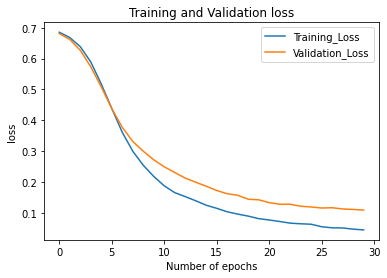

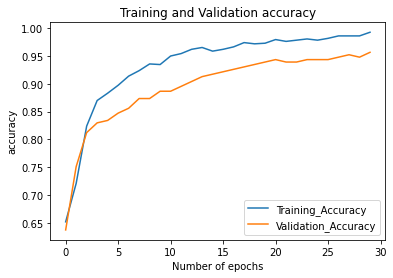

In [29]:
# Loss Model 1
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
# Akurasi Model 1
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [30]:
# Definisi hyperparameters LSTM 
n_lstm = 20
drop_lstm =0.2

In [31]:
# Model 2 - Arsitektur LSTM
model1 = Sequential()
model1.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(Dense(1, activation='sigmoid'))

In [39]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 16)            8000      
_________________________________________________________________
lstm (LSTM)                  (None, 50, 20)            2960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 20)            3280      
_________________________________________________________________
dense_2 (Dense)              (None, 50, 1)             21        
Total params: 14,261
Trainable params: 14,261
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Parameter training model 2
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [34]:
# proses training model 2 menggunakan dataset training dan testing
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model1.fit(training_padded, train_label, epochs=num_epochs, validation_data=(testing_padded, test_label),callbacks =[early_stop], verbose=2)

Epoch 1/30
29/29 - 6s - loss: 0.6729 - accuracy: 0.6577 - val_loss: 0.6397 - val_accuracy: 0.6666
Epoch 2/30
29/29 - 1s - loss: 0.4571 - accuracy: 0.7765 - val_loss: 0.2948 - val_accuracy: 0.9209
Epoch 3/30
29/29 - 1s - loss: 0.2288 - accuracy: 0.9363 - val_loss: 0.2358 - val_accuracy: 0.9325
Epoch 4/30
29/29 - 1s - loss: 0.2058 - accuracy: 0.9463 - val_loss: 0.2453 - val_accuracy: 0.9329
Epoch 5/30
29/29 - 1s - loss: 0.1778 - accuracy: 0.9512 - val_loss: 0.2187 - val_accuracy: 0.9368
Epoch 6/30
29/29 - 1s - loss: 0.1646 - accuracy: 0.9566 - val_loss: 0.2213 - val_accuracy: 0.9366
Epoch 7/30
29/29 - 1s - loss: 0.1572 - accuracy: 0.9581 - val_loss: 0.2217 - val_accuracy: 0.9364


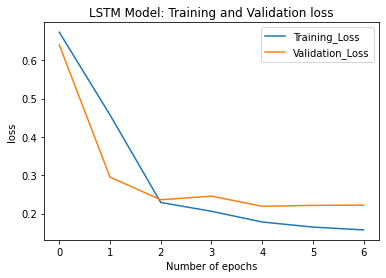

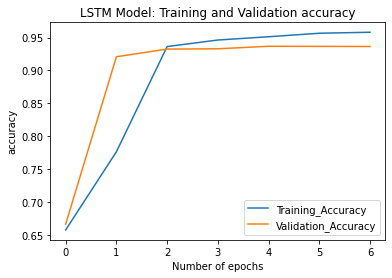

In [35]:
# Visualisasi hasil training dan testing model 2
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [40]:
# Model 3 - Bi-directional Long Short Term Memory (BiLSTM) Arsitektur
model2 = Sequential()
model2.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model2.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True)))
model2.add(Dense(1, activation='sigmoid'))

In [41]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 16)            8000      
_________________________________________________________________
bidirectional_2 (Bidirection (None, 50, 40)            5920      
_________________________________________________________________
dense_5 (Dense)              (None, 50, 1)             41        
Total params: 13,961
Trainable params: 13,961
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Parameter training model 3
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [44]:
# proses training model 3 menggunakan dataset training dan testing
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model2.fit(training_padded, train_label, epochs=num_epochs, 
                    validation_data=(testing_padded, test_label),callbacks =[early_stop], verbose=2)

Epoch 1/30
29/29 - 6s - loss: 0.6875 - accuracy: 0.5202 - val_loss: 0.6773 - val_accuracy: 0.6679
Epoch 2/30
29/29 - 1s - loss: 0.5814 - accuracy: 0.7597 - val_loss: 0.4334 - val_accuracy: 0.9080
Epoch 3/30
29/29 - 1s - loss: 0.2936 - accuracy: 0.9482 - val_loss: 0.2519 - val_accuracy: 0.9288
Epoch 4/30
29/29 - 1s - loss: 0.2008 - accuracy: 0.9478 - val_loss: 0.2212 - val_accuracy: 0.9385
Epoch 5/30
29/29 - 1s - loss: 0.1620 - accuracy: 0.9628 - val_loss: 0.2092 - val_accuracy: 0.9382
Epoch 6/30
29/29 - 1s - loss: 0.1538 - accuracy: 0.9609 - val_loss: 0.1637 - val_accuracy: 0.9523
Epoch 7/30
29/29 - 1s - loss: 0.1174 - accuracy: 0.9707 - val_loss: 0.1529 - val_accuracy: 0.9541
Epoch 8/30
29/29 - 1s - loss: 0.0965 - accuracy: 0.9763 - val_loss: 0.1340 - val_accuracy: 0.9611
Epoch 9/30
29/29 - 1s - loss: 0.0822 - accuracy: 0.9814 - val_loss: 0.1381 - val_accuracy: 0.9607
Epoch 10/30
29/29 - 1s - loss: 0.0752 - accuracy: 0.9824 - val_loss: 0.1765 - val_accuracy: 0.9493


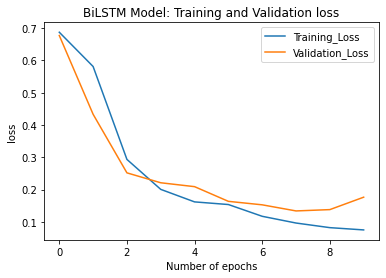

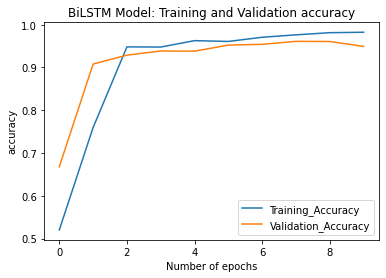

In [45]:
# Visualisasi hasil training dan testing model 3
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('BiLSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
# Plot
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [46]:
# Perbandingan performansi 3 Model Training
print(f"\nDense architecture loss and accuracy: {model.evaluate(testing_padded, test_label)} " )
print(f"\nLSTM architecture loss and accuracy: {model1.evaluate(testing_padded, test_label)} " )
print(f"\nBi-LSTM architecture loss and accuracy: {model2.evaluate(testing_padded, test_label)} " )

8/8 [==============================] - 0s 2ms/step - loss: 0.1084 - accuracy: 0.9563

Dense architecture loss and accuracy: [0.10843697935342789, 0.9563318490982056] 
8/8 [==============================] - 0s 10ms/step - loss: 0.2217 - accuracy: 0.9364

LSTM architecture loss and accuracy: [0.2216878980398178, 0.9364192485809326] 
8/8 [==============================] - 0s 8ms/step - loss: 0.1765 - accuracy: 0.9493

Bi-LSTM architecture loss and accuracy: [0.17654499411582947, 0.9493449926376343] 


In [47]:
# Fungsi prediksi
def predict_spam(prediksi_teks):
    new_seq = tokenizer.texts_to_sequences(prediksi_teks)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return (model.predict(padded))

In [48]:
# Tuliskan teks penting nilainya < 0
prediksi_teks = ["Halo, izin mau asistensi laporan kak"]
predict_spam(prediksi_teks)

array([[0.01225033]], dtype=float32)

In [49]:
# Tuliskan teks spam (penipuan atau promosi) nilainya mendekati 1
prediksi_teks = ["silahkan untuk mengambil hadiah dengan memasukan kode unik 2345. Anda berhasil menang undian berhadiah mobil"]
predict_spam(prediksi_teks)

array([[0.6894418]], dtype=float32)